<a href="https://colab.research.google.com/github/shachimaurya23/Learning/blob/main/Tensorflow/Sarcasm__Prediction_using__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic operations to preprocess data

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
sentences=["i love my dog","I, love my cat","you love my dog!","dogs loves cat"]

In [3]:
tokenizer=Tokenizer(num_words=100,oov_token="<OOV") #num_words tells the max number of words allowed in the vocab  priority= freq.of words, sequesnce   eg 2 words occuring in sentences again and again then we see which comes first.
tokenizer.fit_on_texts(sentences)

In [4]:
word_index=tokenizer.word_index
print(word_index)

{'<OOV': 1, 'love': 2, 'my': 3, 'i': 4, 'dog': 5, 'cat': 6, 'you': 7, 'dogs': 8, 'loves': 9}


In [5]:
print(tokenizer.texts_to_sequences(["My hamster loves dogs and cat"]))

[[3, 1, 9, 8, 1, 6]]


In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[4, 2, 3, 5], [4, 2, 3, 6], [7, 2, 3, 5], [8, 9, 6]]


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded =pad_sequences(sequences)

print(padded)


[[4 2 3 5]
 [4 2 3 6]
 [7 2 3 5]
 [0 8 9 6]]


# Sarcasm Prediction

In [12]:
import json
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2025-01-25 14:23:26--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2025-01-25 14:23:26 (131 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
with open ('/tmp/sarcasm.json',"r") as f:
  datastore=json.load(f)

In [3]:
datastore[:10]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [13]:
len(datastore)

26709

In [4]:
sentences=[]
label=[]

for item in datastore:
  sentences.append(item["headline"])
  label.append(item["is_sarcastic"])

In [16]:
sentences[:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [17]:
label[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [5]:
vocab_size=10000
max_length=100
oov_trunc="<OOV>"
trunc_type="post"
padding_type="post"
embedding_dim=16

In [6]:
X_train,X_test,y_train,y_test=train_test_split(sentences,label,test_size=0.2,random_state=42)

In [9]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_trunc)
#tokenize the train data
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
X_train=tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(X_train,maxlen=max_length,padding=padding_type,truncating=trunc_type)

#toeknize the test data
tokenizer.fit_on_texts(X_test)
word_index=tokenizer.word_index
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test,maxlen=max_length,padding=padding_type,truncating=trunc_type)


In [13]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [105]:
#tried with a simple nn without dropout and regularization but the model was highly overfitted with test accuray 53% and train at 98%
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),  # Add dropout to reduce overfitting
    tf.keras.layers.Dense(24, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),  # L2 regularization
    tf.keras.layers.Dropout(0.3),  # Add another dropout layer
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#adding callback for dynamic Learning Rate and for Early Stopping that halts training when validation loss stops improving
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [106]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [107]:
num_epochs=40
history=model.fit(X_train,y_train,epochs=num_epochs,validation_split=0.1,callbacks=callbacks,verbose=2)

Epoch 1/40
601/601 - 6s - 11ms/step - binary_accuracy: 0.5618 - loss: 0.7262 - precision_7: 0.2308 - recall_7: 3.5629e-04 - val_binary_accuracy: 0.5517 - val_loss: 0.6888 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/40
601/601 - 4s - 7ms/step - binary_accuracy: 0.5621 - loss: 0.6850 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_binary_accuracy: 0.5517 - val_loss: 0.6842 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/40
601/601 - 2s - 4ms/step - binary_accuracy: 0.5782 - loss: 0.6719 - precision_7: 0.7344 - recall_7: 0.0575 - val_binary_accuracy: 0.5737 - val_loss: 0.6463 - val_precision_7: 0.9796 - val_recall_7: 0.0501 - learning_rate: 0.0010
Epoch 4/40
601/601 - 3s - 5ms/step - binary_accuracy: 0.6986 - loss: 0.6081 - precision_7: 0.7554 - recall_7: 0.4610 - val_binary_accuracy: 0.7946 - val_loss: 0.5523 - val_precision_7: 0.8833 - val_recall_7: 0.6242 - learning_rate: 0.0010
Epoch 5/40
601/

In [108]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_8           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

In [109]:
X_test_score=model.predict(X_test,verbose=2)

167/167 - 0s - 2ms/step


In [110]:
for i in X_test_score:
  if i[0] < 0.5:
    i[0]=0
  else:
    i[0]=1

In [111]:
correct_predict_count=0
incorrect_predict_count=0
for i,j in zip(X_test_score,y_test):
  # print(i[0])
  if i[0]==j:
    correct_predict_count+=1
  else:
    incorrect_predict_count+=1


In [112]:
correct_predict_count

3471

In [113]:
incorrect_predict_count

1871

In [114]:
test_accuracy=correct_predict_count/len(y_test)
test_accuracy

0.6497566454511419

In [115]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'precision_7', 'recall_7', 'val_binary_accuracy', 'val_loss', 'val_precision_7', 'val_recall_7', 'learning_rate'])

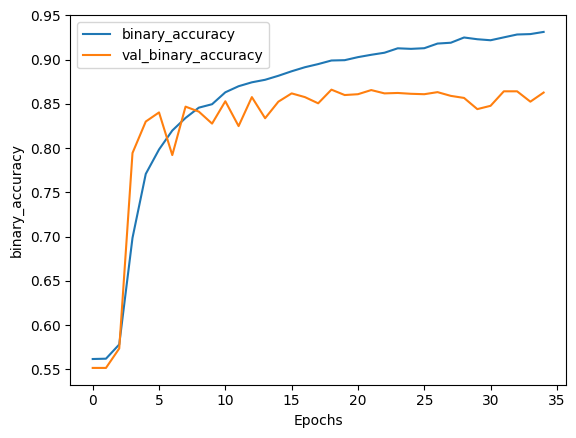

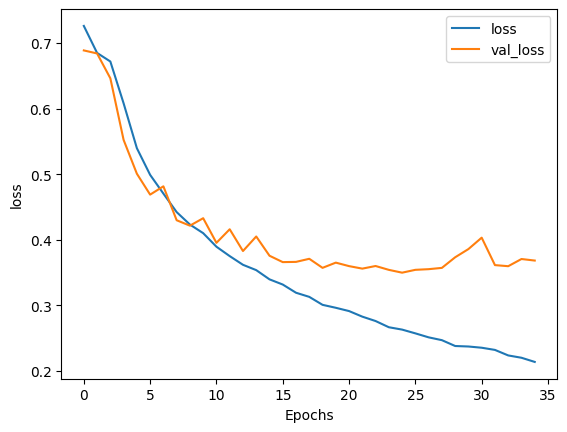

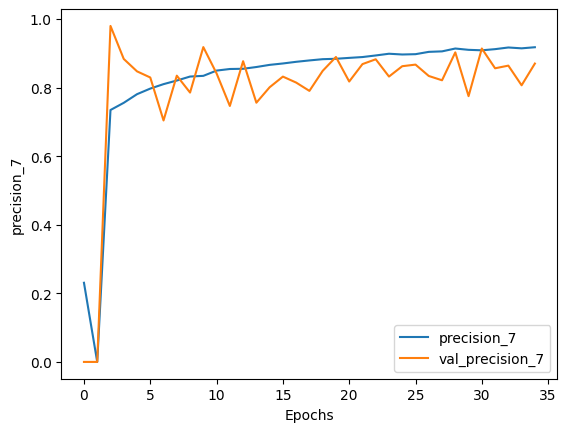

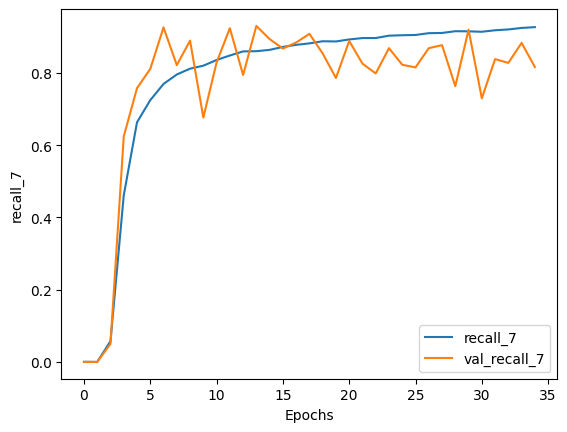

In [118]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "binary_accuracy")
plot_graphs(history, "loss")
plot_graphs(history,"precision_7")
plot_graphs(history,"recall_7")

In [120]:
sarcasm_data = [
    {"text": "Oh, great! Another meeting that could've been an email. My day just got so much better!", "label": 1},
    {"text": "Sure, I’d love to stay late at work. Who needs a personal life anyway?", "label": 1},
    {"text": "Wow, you're so right—waiting in traffic for hours is my favorite part of the day.", "label": 1},
    {"text": "Oh, no problem! I *love* cleaning up after everyone else.", "label": 1},
    {"text": "What a brilliant idea—let’s solve one problem by creating five more!", "label": 1},
    {"text": "Good morning! I hope you have a fantastic day ahead.", "label": 0},
    {"text": "Thank you so much for your help, I really appreciate it.", "label": 0},
    {"text": "The weather looks nice today. Let’s go for a walk.", "label": 0},
    {"text": "I finished all my tasks on time and feel great about it.", "label": 0},
    {"text": "I’m so proud of you for achieving your goals!", "label": 0},
]

In [132]:
sarcasm_sentences=[]
for i in sarcasm_data:
  sarcasm_sentences.append(i["text"])

In [133]:
sarcasm_sentences=tokenizer.texts_to_sequences(sarcasm_sentences)
sarcasm_sentences=pad_sequences(sarcasm_sentences,max_length,padding=padding_type,truncating=trunc_type)

In [136]:
sarcasm_predict=model.predict(sarcasm_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [137]:
for i in sarcasm_predict:
  if i[0] < 0.5:
    i[0]=0
  else:
    i[0]=1

In [140]:
for i,j in zip(sarcasm_predict,sarcasm_data):
  print(f'Predicted: {int(i[0])}, Actual: {j["label"]}')

Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
